In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import numpy as np

In [2]:
dataset = load_iris()

In [3]:
x = dataset.data[:,:2]
y = (dataset.target != 0) * 1

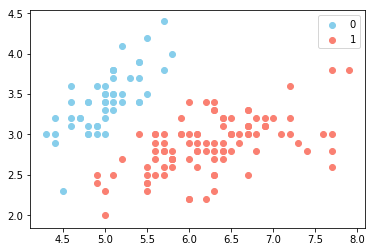

In [4]:
plt.scatter(x[y == 0][:, 0], x[y == 0][:, 1], color='skyblue', label='0')
plt.scatter(x[y == 1][:, 0], x[y == 1][:, 1], color='salmon', label='1')
plt.legend()
plt.show()

### Hyphotesis

Linear Regresion:
\begin{equation}
    h(x) = \theta^{T}x
\end{equation}

Apply the sigmoid function to the output:
\begin{equation}
    h(x) =  \sigma(\theta^{T}x)
\end{equation}

Where the sigmoid function:
\begin{equation}
    \sigma(z) = \frac{1}{1 + \epsilon^{-z}}
\end{equation}

The hypothesis for logistic regression then becomes:
\begin{equation}
    \begin{aligned}
        h(x) =&\; \frac{1}{1 + \epsilon^{-(\theta^{T}x)}}\\
        h(x) =&\; \left\{\begin{array}{ll}
                >0.6 & \theta^T x > 0\\
                <0.5 & \theta^T x < 0
            \end{array}\right.
    \end{aligned}
\end{equation}


Where\
$\theta:$ weigth\
$x:$ variable

### Loss
$cost = \left\{\begin{array}{ll}
        -\log(h(x)) & y == 1\\
        -\log(1-h(x)) & y == 0
    \end{array}\right.$

Intuition
\begin{equation}
    cost(h(x), y)= -y\log(h(x)) - (1-y)\log(1-h(x))
\end{equation}

Cost to all samples\
\begin{equation}
    J(\theta) = -\frac{1}{m} \sum^{m}_{i=1}\left( -y^i \log(h(x^i)) - (1-y^i)\log(1-h(x^i)) \right)
\end{equation}

Where:\
$m:$ training samples

### Gradient Descent
\begin{equation}
\frac{\partial J(\theta)}{\partial \theta_j} = \frac{1}{m}\sum_{i=1}^{m} \left( h(x^i) - y^i \right)x^i_j
\end{equation}

In [5]:
class LogisticRegression:

    def sigmoid(self, z):
        return 1 / (1 + np.power(np.e, -z))
    
    def loss(self, h, y):
        return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()
    
    def add(self, x):
        intercept = np.ones((x.shape[0], 1))
        return np.concatenate((intercept, x), axis=1)
    
    def fit(self, x, y, epochs=1000, lr=0.01):        
        x = self.add(x)                # Bias
        theta = np.zeros(x.shape[1])   # Weights
        
        for i in range(epochs):            
            z = np.dot(x, theta)
            h = self.sigmoid(z)
            grad = np.dot(x.T, (h - y)) / y.size
            theta -= (grad * lr)
                        
            if(i % 100 == 0):
                z = np.dot(x, theta)
                h = self.sigmoid(z)
                loss = self.loss(h, y)
                print('epoch {} - loss: {}'.format(i, loss))
        
        self.theta = theta
        
    def predict(self, x):
        pr = self.sigmoid(np.dot(x, self.theta))
        return pr.round()

In [6]:
model = LogisticRegression()
model.fit(x, y, 20000)

epoch 0 - loss: 0.6766315269371207
epoch 100 - loss: 0.5641189952299286
epoch 200 - loss: 0.5196802218745692
epoch 300 - loss: 0.48111533334174944
epoch 400 - loss: 0.4475659269443241
epoch 500 - loss: 0.4182723484639883
epoch 600 - loss: 0.3925807715742558
epoch 700 - loss: 0.3699382383545483
epoch 800 - loss: 0.34988191196248664
epoch 900 - loss: 0.3320264457194192
epoch 1000 - loss: 0.31605159857156073
epoch 1100 - loss: 0.30169108745871626
epoch 1200 - loss: 0.28872301391797905
epoch 1300 - loss: 0.2769618649467146
epoch 1400 - loss: 0.26625193615313103
epoch 1500 - loss: 0.25646197345895627
epoch 1600 - loss: 0.24748082764825383
epoch 1700 - loss: 0.23921393594026832
epoch 1800 - loss: 0.23158047195681347
epoch 1900 - loss: 0.22451103292508304
epoch 2000 - loss: 0.2179457576884217
epoch 2100 - loss: 0.21183279011156592
epoch 2200 - loss: 0.2061270197492313
epoch 2300 - loss: 0.20078904558905497
epoch 2400 - loss: 0.19578431979934205
epoch 2500 - loss: 0.191082437222602
epoch 2600 

In [7]:
parameter = model.theta
parameter

array([-1.15564566,  3.7575086 , -6.11493461])

$\theta = [\theta_0, \theta_2, \theta_2]$\
$h(x) = \theta_0 + \theta_{1}x_1 + \theta_{2}x_2$

Equal to 0 to resolve:
\begin{equation}
x_2 = -\frac{\theta_0 + \theta_{1}x_1}{\theta_2}
\end{equation}

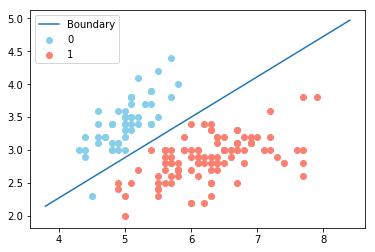

In [8]:
# Plot in 2D [Just when the data is in 2D]
x_val = [np.min(x[:, 0] - 0.5), np.max(x[:,0] + 0.5)]
y_val = -(parameter[0] + np.dot(parameter[1], x_val)) / parameter[2]

plt.scatter(x[y == 0][:, 0], x[y == 0][:, 1], color='skyblue', label='0')
plt.scatter(x[y == 1][:, 0], x[y == 1][:, 1], color='salmon', label='1')
plt.plot(x_val, y_val, label='Boundary')
plt.legend()
plt.show()